<a href="https://colab.research.google.com/github/krishh1703/INSE-6220/blob/main/KIDNEY_STONE_URINE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

START - IMPORT PYTHON **MODULES**


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**UPLOAD** **FILE**

In [ ]:
from google.colab import files
uploaded = files.upload()
#read cvs file into dataframe
#df = pd.read_excel("PCOS_edited.xlsx",sheet_name="Full_new")
df = pd.read_csv('kidney stone urine analysis.csv')
df.head(n=25)

Saving kidney stone urine analysis edited.csv to kidney stone urine analysis edited.csv


,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725.0,14.0,443.0,2.45,0
1,1.017,7.74,577.0,20.0,296.0,4.49,0
2,1.008,7.20,321.0,14.9,101.0,2.36,0
3,1.011,5.51,408.0,12.6,224.0,2.15,0
4,1.005,6.52,187.0,7.5,91.0,1.16,0
5,1.020,5.27,668.0,25.3,252.0,3.34,0
6,1.012,5.62,461.0,17.4,195.0,1.40,0
7,1.029,7.67,1107.0,35.9,550.0,8.48,0
8,1.015,5.41,543.0,21.9,170.0,1.16,0
9,1.021,6.13,779.0,25.7,382.0,2.21,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     float64
 3   cond     79 non-null     float64
 4   urea     79 non-null     float64
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 4.4 KB


**CLASSES**

In [ ]:
y = df['target']
target = df['target'].to_numpy()

**FEATURES**

DATA MATRIX

In [ ]:
X = df.iloc[:,0:6]
X.head(10)

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725.0,14.0,443.0,2.45
1,1.017,7.74,577.0,20.0,296.0,4.49
2,1.008,7.20,321.0,14.9,101.0,2.36
3,1.011,5.51,408.0,12.6,224.0,2.15
4,1.005,6.52,187.0,7.5,91.0,1.16
5,1.020,5.27,668.0,25.3,252.0,3.34
6,1.012,5.62,461.0,17.4,195.0,1.40
7,1.029,7.67,1107.0,35.9,550.0,8.48
8,1.015,5.41,543.0,21.9,170.0,1.16
9,1.021,6.13,779.0,25.7,382.0,2.21


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gravity,79.0,1.018114,0.007239,1.005,1.012,1.018,1.0235,1.04
ph,79.0,6.117089,0.820424,4.760,5.530,5.960,6.6200,8.12
osmo,79.0,612.848101,237.514755,187.000,413.000,594.000,792.0000,1236.00
cond,79.0,20.813924,7.938994,5.100,14.150,21.400,26.5500,38.00
urea,79.0,266.405063,131.254550,10.000,160.000,260.000,372.0000,620.00
calc,79.0,4.138987,3.260051,0.170,1.460,3.160,5.9300,14.34


NOTICE THAT THE DATA IS NOT STANDARDIZED. SO WE NEED TO STANDARDIZE IT.

In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gravity,79.0,-4.145137e-14,1.00639,-1.823023,-0.849923,-0.015837,0.748742,3.042477
ph,79.0,3.031330e-15,1.00639,-1.664701,-0.720164,-0.192696,0.616907,2.456913
osmo,79.0,-2.164232e-16,1.00639,-1.804390,-0.846790,-0.079863,0.759097,2.640399
cond,79.0,2.220446e-16,1.00639,-1.991982,-0.844755,0.074294,0.727136,2.178600
urea,79.0,-1.124276e-17,1.00639,-1.965977,-0.815857,-0.049111,0.809646,2.711177
calc,79.0,4.637640e-16,1.00639,-1.225241,-0.827013,-0.302217,0.552892,3.149090


NOTICE THAT THE DATA IS NOW STANDARDIZED.

**OBSERVATIONS AND VARIABLES**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']


**DATA VISUALIZATION**

CLASS DISTRIBUTION

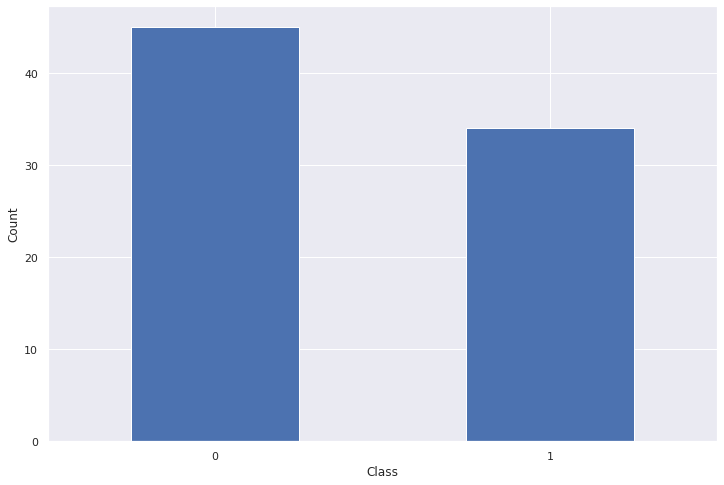

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

BOX PLOT AND WHISKERS

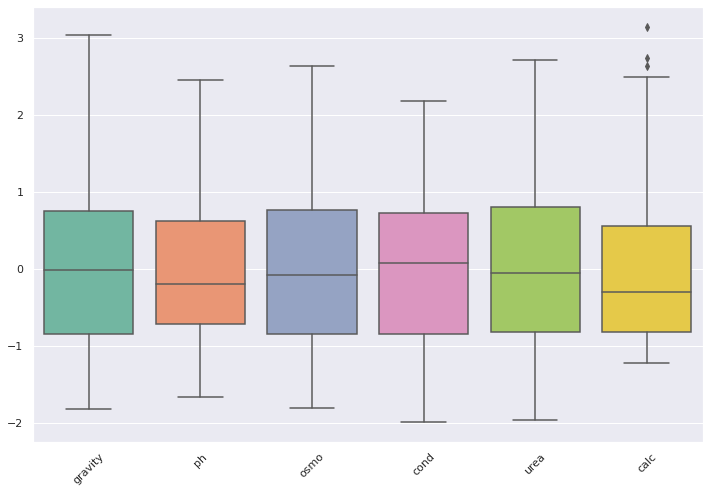

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

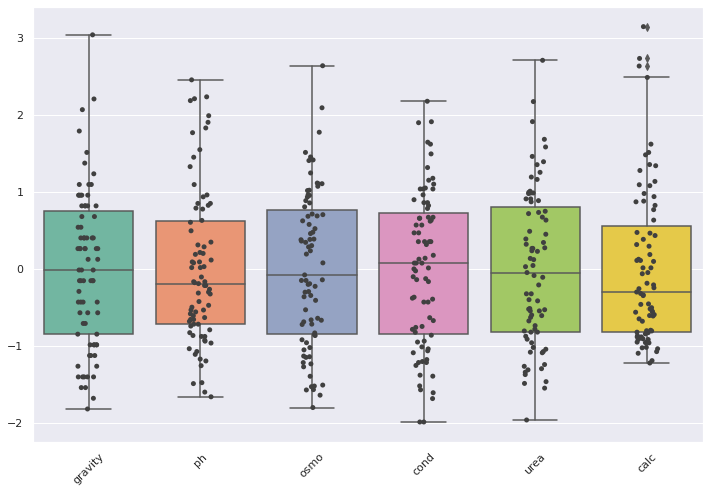

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

FIVE NUMBER SUMMARY

In [ ]:
df.describe()

,gravity,ph,osmo,cond,urea,calc
count,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01
mean,-4.145137e-14,3.031330e-15,-2.164232e-16,2.220446e-16,-1.124276e-17,4.637640e-16
std,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00
min,-1.823023e+00,-1.664701e+00,-1.804390e+00,-1.991982e+00,-1.965977e+00,-1.225241e+00
25%,-8.499228e-01,-7.201644e-01,-8.467899e-01,-8.447551e-01,-8.158572e-01,-8.270132e-01
50%,-1.583707e-02,-1.926960e-01,-7.986257e-02,7.429416e-02,-4.911061e-02,-3.022170e-01
75%,7.487415e-01,6.169066e-01,7.590966e-01,7.271360e-01,8.096456e-01,5.528922e-01
max,3.042477e+00,2.456913e+00,2.640399e+00,2.178600e+00,2.711177e+00,3.149090e+00


PAIR PLOT

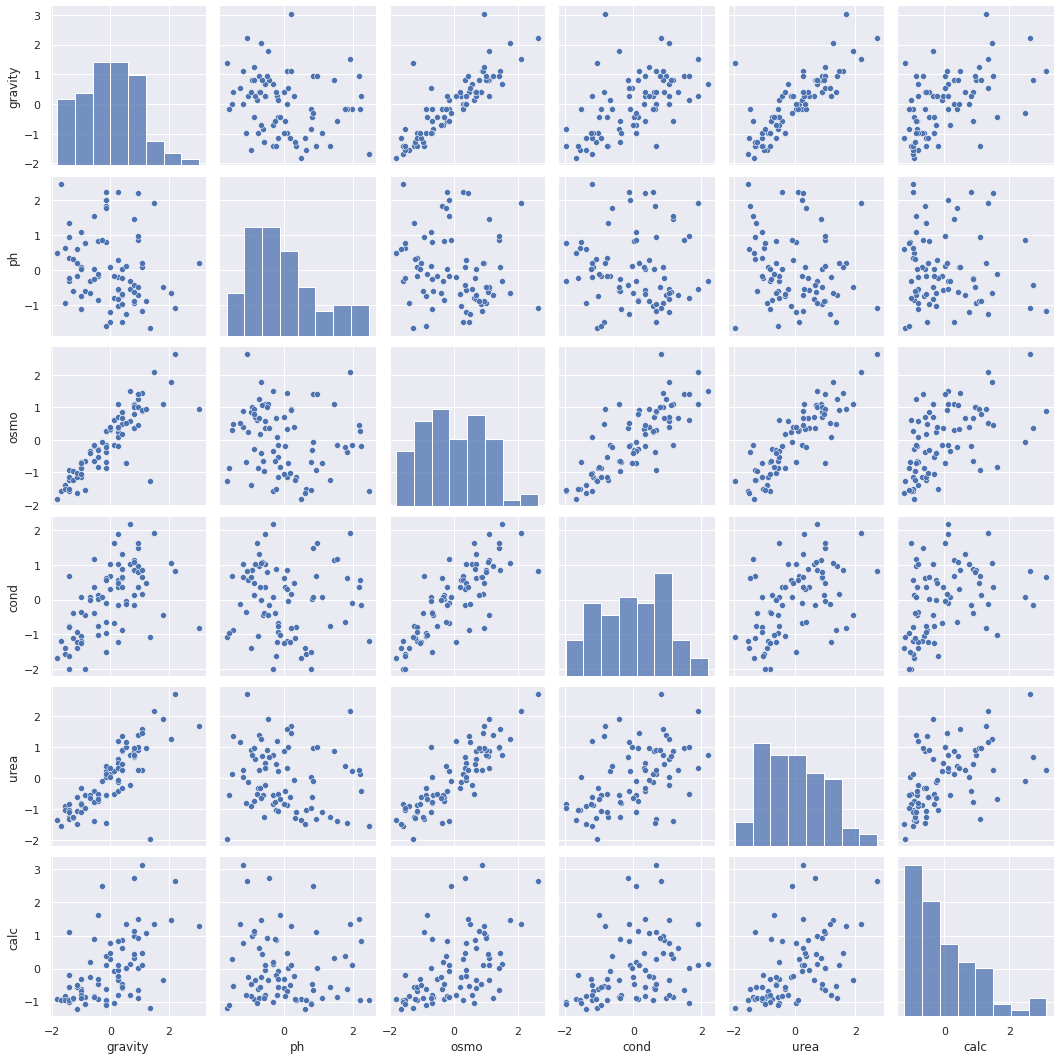

In [ ]:
sns.pairplot(df)

COVARIANCE

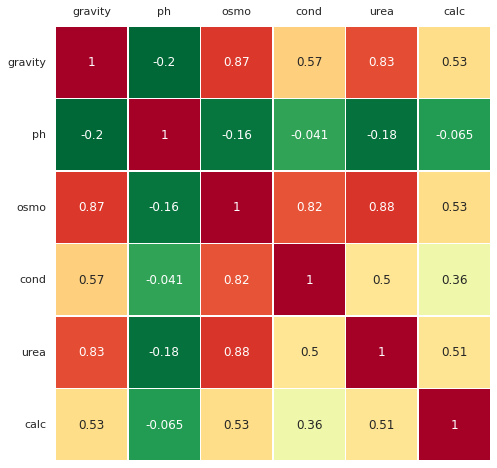

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

**PRINCIPAL COMPONENT ANALYSIS (PCA)**

Text(0, 0.5, '$Z_2$')

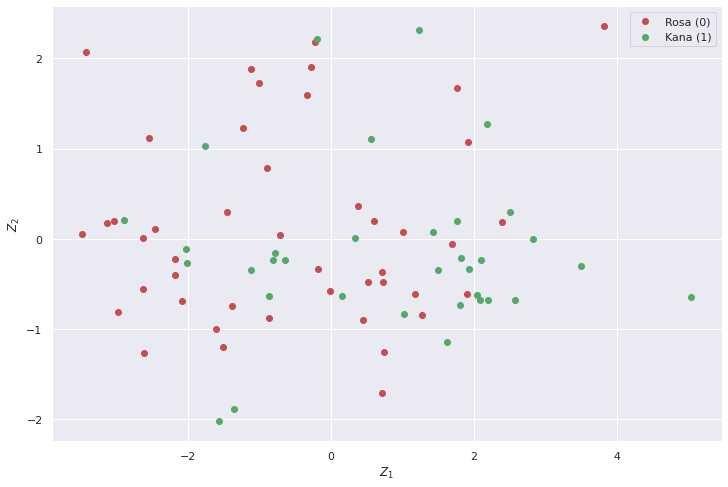

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
#idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

**EIGENVECTORS**

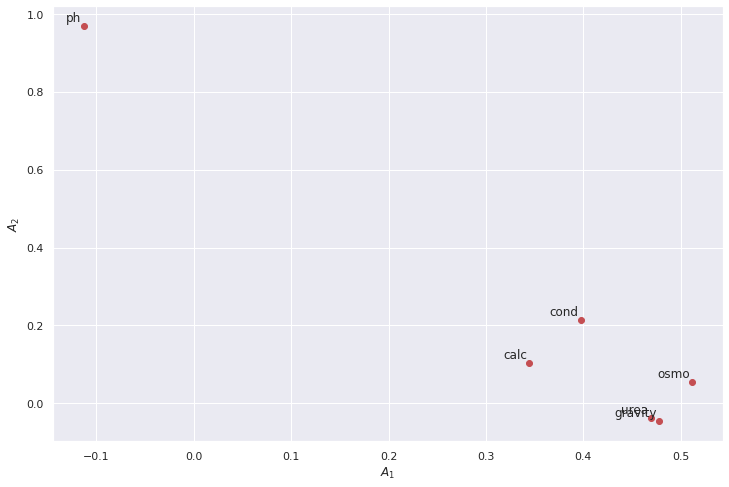

In [ ]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


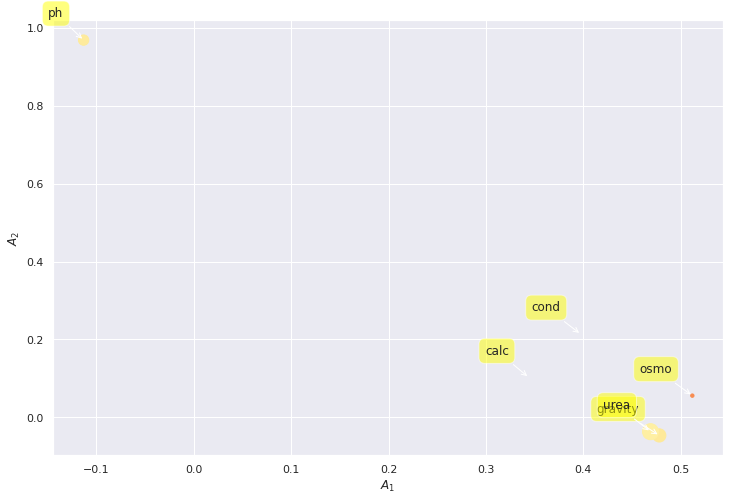

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**SCREE PLOT**

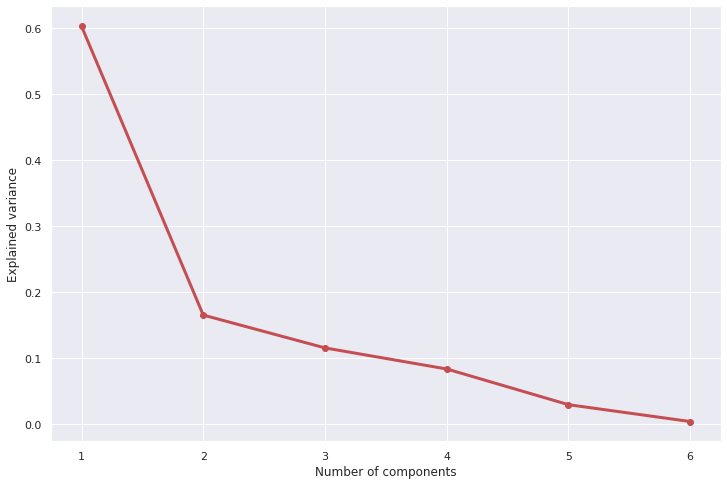

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**EXPLAINED VARIANCE**

Text(0, 0.5, 'Cumulative explained variance')

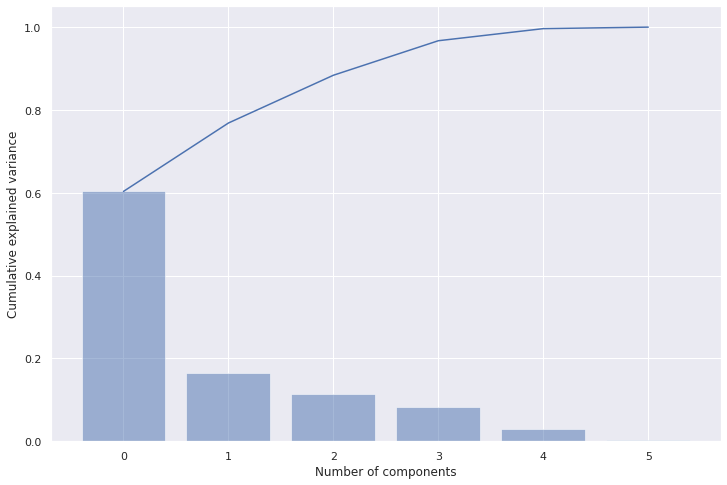

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

EXPLAINED VARIANCE PER PC

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (60.3%)',
 '1': 'PC 2 (16.5%)',
 '2': 'PC 3 (11.5%)',
 '3': 'PC 4 (8.3%)',
 '4': 'PC 5 (2.9%)',
 '5': 'PC 6 (0.4%)'}

**BIPLOT**

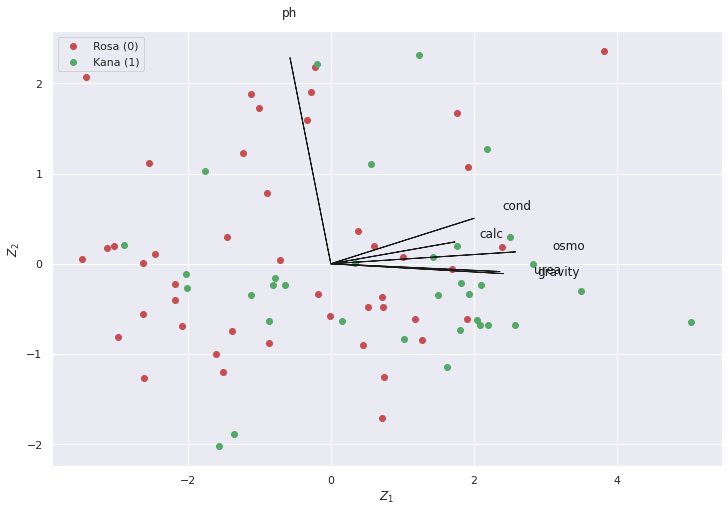

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')



**USING PCA LIBRARY**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC  feature   loading  type
0  PC1     osmo  0.512069  best
1  PC2       ph  0.968092  best
2  PC3     calc  0.810117  best
3  PC4     cond -0.594972  best
4  PC1  gravity  0.478123  weak
5  PC4     urea  0.514902  weak


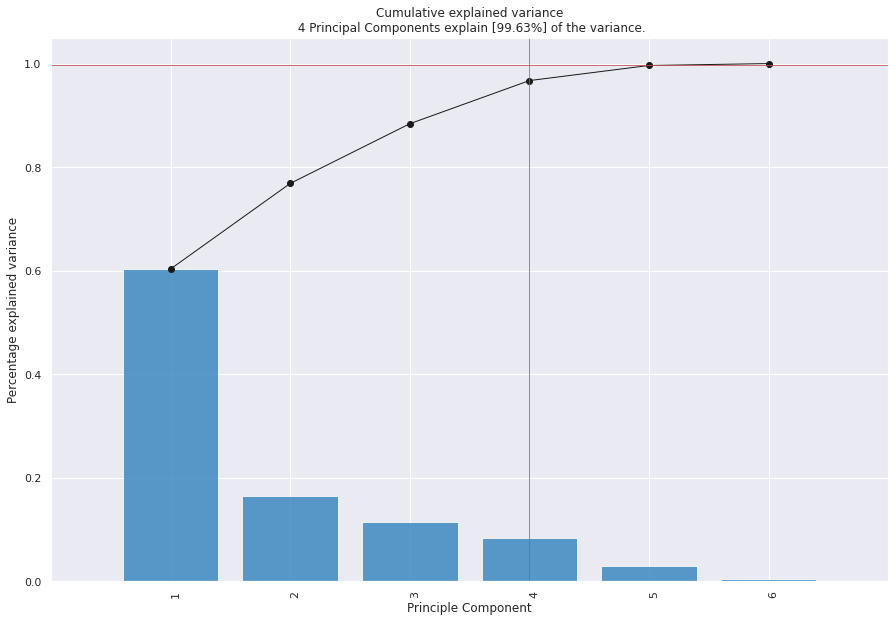

<Figure size 864x576 with 0 Axes>

In [ ]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [79] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [79] unique colors! Available unique colors: [9].


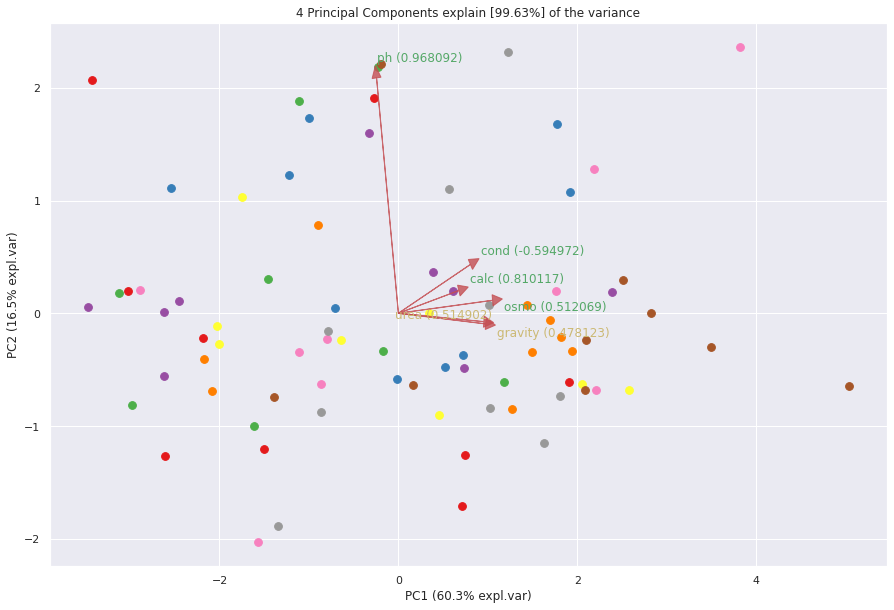

In [ ]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [79] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [79] unique colors! Available unique colors: [9].


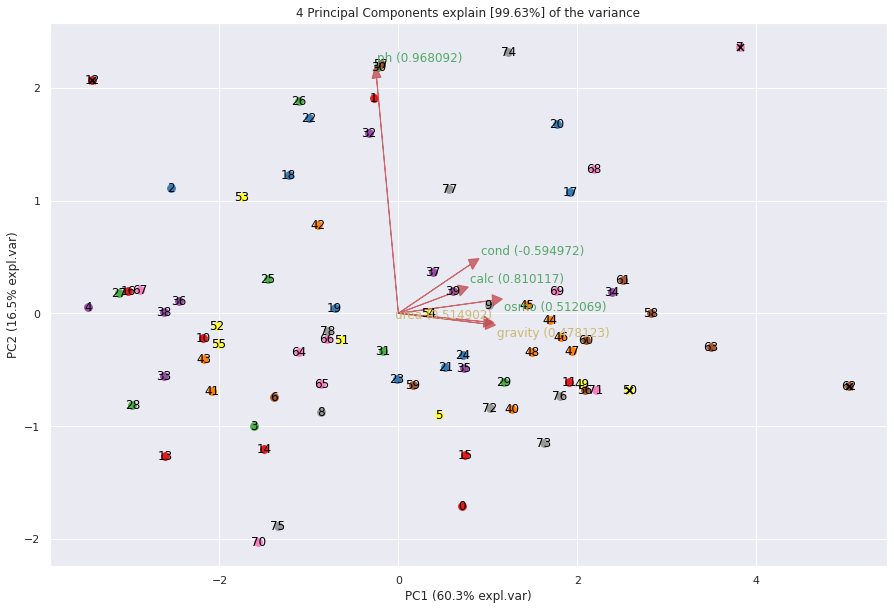

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66856232e0>)

In [ ]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.

[pca] >Plot PC1 vs PC2 with loadings.


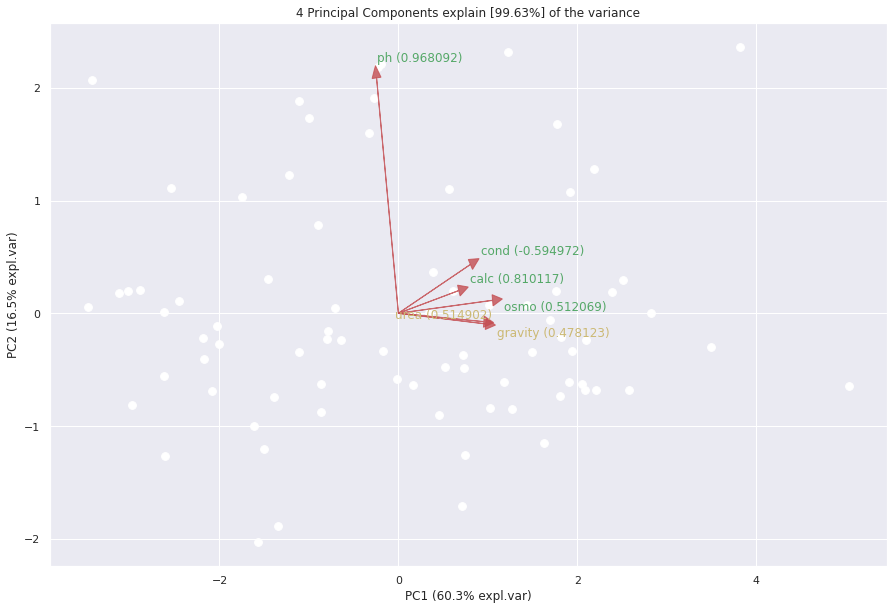

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6685790430>)

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [79] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [79] unique colors! Available unique colors: [9].


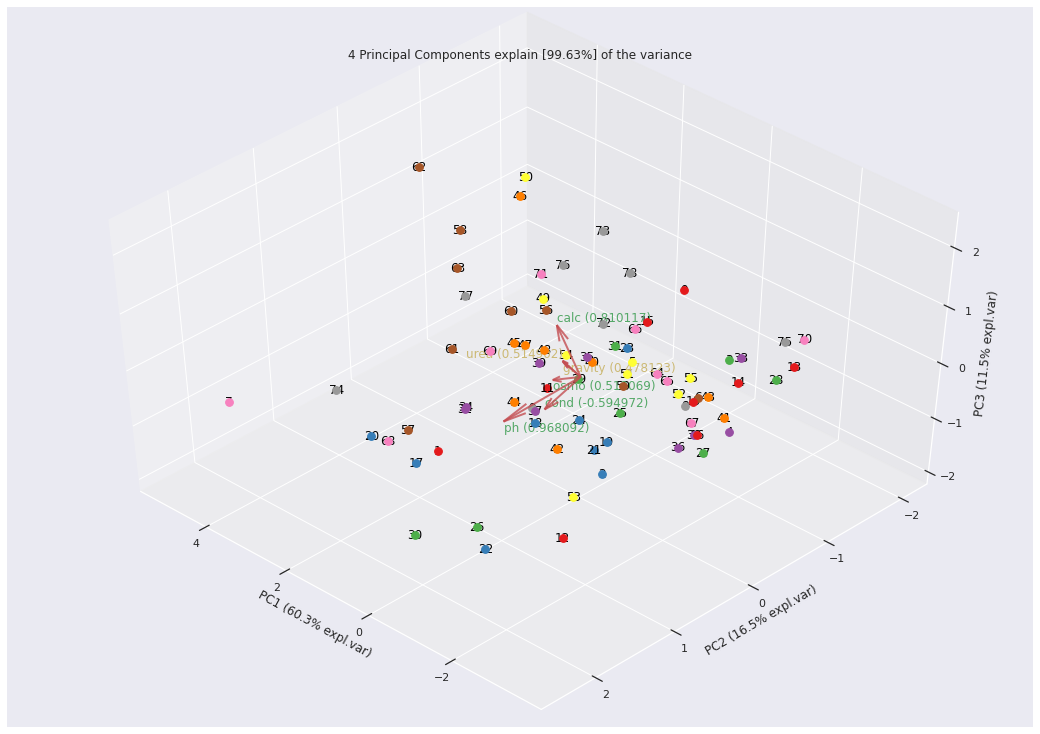

In [ ]:
ax = model.biplot3d(legend=False)